In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
data = pd.read_csv("weather.csv")
data.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6         No   
1       1012.4       1008.4         5         3     17.5     25.7        Yes   
2       1009.5       1007.2         8         7     15.4     20.2        Yes   
3       1005.5       1007.0         2         7     13.5     14.1        Yes   
4       1018.3       1018.5         7         7     11.1     15.4        Yes   

   RISK_MM RainTomorrow  
0      3.6          Yes  
1      3.6          Yes  
2     39.8          Yes  
3      2.8          Yes  
4      0.0           No  

[5 rows x 22 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [4]:
data.dropna(inplace =True)
data.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [5]:
data = data.drop(['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'],axis=1)

In [6]:
X = data.drop(['Rainfall'], axis = 1)
# the output or the label.
Y = data['Rainfall']
# reshaping it into a 2-D vector
Y = Y.values.reshape(-1, 1)
day_index = 100
days = [i for i in range(Y.size)]
  
# initialize a linear regression classifier
clf = LinearRegression()
# train the classifier with our 
# input data.
clf.fit(X, Y)


LinearRegression()

In [7]:
# give a sample input to test our model
# this is a 2-D vector that contains values
# for each column in the dataset.
inp = np.array([[15], [22], [3], [7], [60], [45], [30], [45],
                [57], [1020], [1015], [7], [4], [18], [22], [4]])
inp = inp.reshape(1, -1)
  
# print the output.
print('The precipitation in inches for the input is:', clf.predict(inp))
  


The precipitation in inches for the input is: [[1.57196306]]


the precipitation trend graph: 


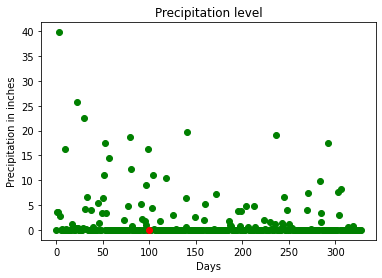

In [8]:
# plot a graph of the precipitation levels
# versus the total number of days.
# one day, which is in red, is
# tracked here. It has a precipitation
# of approx. 2 inches.
print("the precipitation trend graph: ")
plt.scatter(days, Y, color = 'g')
plt.scatter(days[day_index], Y[day_index], color ='r')
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")
  
  
plt.show()


In [9]:
X.head()

MinTemp  MaxTemp  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
0      8.0     24.3          3.4       6.3           30.0           6.0   
1     14.0     26.9          4.4       9.7           39.0           4.0   
2     13.7     23.4          5.8       3.3           85.0           6.0   
3     13.3     15.5          7.2       9.1           54.0          30.0   
4      7.6     16.1          5.6      10.6           50.0          20.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0            20           68           29       1019.7       1015.0         7   
1            17           80           36       1012.4       1008.4         5   
2             6           82           69       1009.5       1007.2         8   
3            24           62           56       1005.5       1007.0         2   
4            28           68           49       1018.3       1018.5         7   

   Cloud3pm  Temp9am  Temp3pm  RISK_MM  
0         7     14.4     23.6      3.6  
1         3     17.5     25.7      3.6  
2         7     15.4     20.2     39.8  
3         7     13.5     14.1      2.8  
4         7     11.1     15.4      0.0

In [10]:
x_vis = X.filter(['MinTemp', 'MaxTemp', 'Evaporation',
                  'Sunshine', 'WindGustSpeed',
                  'Cloud9am','Cloud3pm','Temp9am','Temp3pm','Risk_MM'], axis = 1)
  
# plot a graph with a few features (x values)
# against the precipitation or rainfall to observe
# the trends
  
x_vis

MinTemp  MaxTemp  Evaporation  Sunshine  WindGustSpeed  Cloud9am  \
0        8.0     24.3          3.4       6.3           30.0         7   
1       14.0     26.9          4.4       9.7           39.0         5   
2       13.7     23.4          5.8       3.3           85.0         8   
3       13.3     15.5          7.2       9.1           54.0         2   
4        7.6     16.1          5.6      10.6           50.0         7   
..       ...      ...          ...       ...            ...       ...   
361      9.0     30.7          7.6      12.1           76.0         1   
362      7.1     28.4         11.6      12.7           48.0         0   
363     12.5     19.9          8.4       5.3           43.0         3   
364     12.5     26.9          5.0       7.1           46.0         6   
365     12.3     30.2          6.0      12.6           78.0         1   

     Cloud3pm  Temp9am  Temp3pm  
0           7     14.4     23.6  
1           3     17.5     25.7  
2           7     15.4     20.2  
3           7     13.5     14.1  
4           7     11.1     15.4  
..        ...      ...      ...  
361         3     20.4     30.0  
362         1     17.2     28.2  
363         2     14.5     18.3  
364         7     15.8     25.9  
365         1     23.8     28.6  

[328 rows x 9 columns]

Precipitation vs selected attributes graph: 


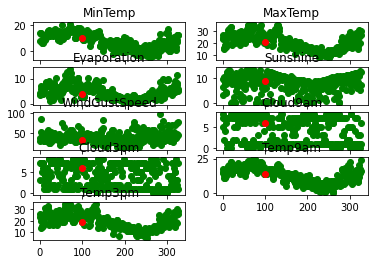

In [11]:
print("Precipitation vs selected attributes graph: ")
  
for i in range(x_vis.columns.size):
    plt.subplot(5, 2, i+1)
    plt.scatter(days, x_vis[x_vis.columns.values[i][:100]],
                                               color = 'g')
  
    plt.scatter(days[day_index], 
                x_vis[x_vis.columns.values[i]][day_index],
                color ='r')
  
    plt.title(x_vis.columns.values[i])
  
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
linereg = LinearRegression()
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.30,shuffle = True)

In [13]:
linereg.fit(xtrain,ytrain)

LinearRegression()

In [14]:
x_predict = linereg.predict(xtrain)

In [15]:
day =np.array(data['Rainfall'])

In [16]:
date = np.array([[8], [25], [3.5], [7], [30], [6], [20], [68],
                [29], [1020], [1015], [7], [7], [15], [24], [4]])

In [17]:
date = date.reshape(1,-1)

In [18]:
date

array([[   8. ,   25. ,    3.5,    7. ,   30. ,    6. ,   20. ,   68. ,
          29. , 1020. , 1015. ,    7. ,    7. ,   15. ,   24. ,    4. ]])

In [19]:
day = clf.predict(date)

In [20]:
if (day >0):
    print("Rainfall of ",day[0],'inches')
else:
    print("No Rainfall")

No Rainfall


In [27]:
from sklearn.metrics import accuracy_score
# accuracy=accuracy_score(ytest,ytrain)

ValueError: Found input variables with inconsistent numbers of samples: [99, 229]